In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
# Read admission data 
df = pd.read_csv('../data/admissions.csv')
print(df.shape)
print()
print(df.columns)
print()
print(df.describe())



(400, 4)

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


![admissions dictionary](../img/admissions-dictionary.png)

# Correlation matrix

In [6]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


# Correlation between GRE and GPA

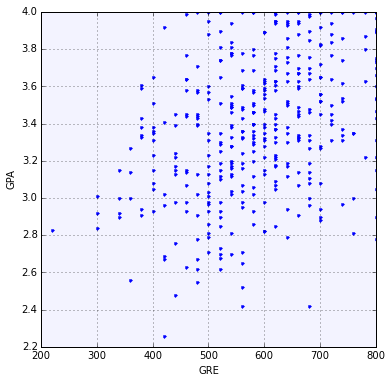

In [12]:
fig, ax = plt.subplots(figsize=(6,6))

plt.plot(df.gre, df.gpa, '.')
plt.xlabel('GRE')
plt.ylabel('GPA')
plt.grid()

# Linear regression model


first normalize the data


In [40]:
df.gre = (df.gre-min(df.gre))/(max(df.gre)-min(df.gre))
df.gpa = (df.gpa-min(df.gpa))/(max(df.gpa)-min(df.gpa))

In [42]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='gpa ~ gre', data=df).fit()
print(lm.summary())
slope = lm.params[0]
intercept = lm.params[1]
print("slope: %s "% slope)
print("intercept: %s "% intercept)


                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     67.66
Date:                Sun, 26 Jun 2016   Prob (F-statistic):           2.84e-15
Time:                        13:21:48   Log-Likelihood:                 72.371
No. Observations:                 397   AIC:                            -140.7
Df Residuals:                     395   BIC:                            -132.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3851      0.034     11.376      0.0

/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


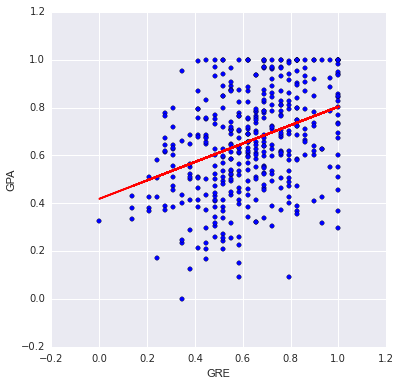

In [43]:

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df.gre, df.gpa)
ax.plot(df.gre,  slope * df.gre +intercept, color='red')
plt.xlabel('GRE')
plt.ylabel('GPA')


# Anscombe's quartet 
https://en.wikipedia.org/wiki/Anscombe%27s_quartet

![Anscombe's quartet ](../img/Anscombe_quartet_3.svg)


# Multi linear regression
Use gre, gpa and prestige to predict admission

$$ admit = a * GRE + b * GPA + c * Prestige + d $$


In [49]:
# Regression model
lm = smf.ols(formula='admit ~ gre + gpa + prestige', data=df).fit()

# Result
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Sun, 26 Jun 2016   Prob (F-statistic):           1.65e-08
Time:                        13:48:55   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2650      0.110      2.408      0.0

In [50]:
lm.params

Intercept    0.264989
gre          0.251882
gpa          0.254429
prestige    -0.109666
dtype: float64

$$
    admit = 0.25 * GRE + 0.25 * GPA  - 0.11 * Prestige + 0.26
$$